# Pattern Recognition - Final Report Part 1
## 108998408 - Raden Gunawan
## Model Building & Training

## 1. Load All Datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

DATADIR = './face_datasets/'
CATEGORIES = ['Taiwanese','European','ASEAN','Arab','Indian', 
              'African']
IMG_SIZE = 100

training_data_color = []

def build_training_data():
    for category in CATEGORIES:
        path = os.path.join (DATADIR, category) # path to each
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path,img))
                new_array = cv2.resize (img_array, (IMG_SIZE,IMG_SIZE))
                training_data_color.append([new_array,class_num])
            except Exception as e:
                pass

build_training_data()

In [ ]:
len(training_data_color)

4800

In [ ]:
#Shuffle
random.shuffle (training_data_color)

In [ ]:
X_train_color = []
y_train_color = []

for features, labels in training_data_color:
    X_train_color.append(features)
    y_train_color.append (labels)

In [ ]:
X_train_color = np.array (X_train_color)
y_train_color = np.array (y_train_color)

In [ ]:
print (X_train_color.shape)
print (y_train_color.shape)

(4800, 100, 100, 3)
(4800,)


In [ ]:
#create test color

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

DATADIR = './face_datasets_tests/'
CATEGORIES = ['Taiwanese','European','ASEAN','Arab','Indian', 
              'African']
IMG_SIZE = 100
testing_data_color = []

def build_testing_data():
    for category in CATEGORIES:
        path = os.path.join (DATADIR, category) # path to each
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path,img))
                new_array = cv2.resize (img_array, (IMG_SIZE,IMG_SIZE))
                testing_data_color.append([new_array,class_num])
            except Exception as e:
                pass

build_testing_data()


In [ ]:
random.shuffle(testing_data_color)

In [ ]:
X_test_color = [] #feature set
y_test_color = [] # label

for features, labels in testing_data_color:
    X_test_color.append(features)
    y_test_color.append (labels)

In [ ]:
X_test_color = np.array(X_test_color)
y_test_color = np.array(y_test_color)

In [ ]:
print (X_test_color.shape)
print (y_test_color.shape)

(1200, 100, 100, 3)
(1200,)


### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of **4800** samples of training data, **1200** samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are **100 x 100**, with **no color channels** (i.e. they are grayscale, so no BGR channels)

In [ ]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(X_train_color.shape))

print ("Number of samples in our training data: " + str(len(X_train_color)))
print ("Number of labels in our training data: " + str(len(y_train_color)))
print ("Number of samples in our test data: " + str(len(X_test_color)))
print ("Number of labels in our test data: " + str(len(y_test_color)))
print()
print ("Dimensions of x_train:" + str(X_train_color[0].shape))
print ("Labels in x_train:" + str(y_train_color.shape))
print()
print ("Dimensions of x_test:" + str(X_test_color[0].shape))
print ("Labels in y_test:" + str(y_test_color.shape))

Initial shape or dimensions of x_train (4800, 100, 100, 3)
Number of samples in our training data: 4800
Number of labels in our training data: 4800
Number of samples in our test data: 1200
Number of labels in our test data: 1200

Dimensions of x_train:(100, 100, 3)
Labels in x_train:(4800,)

Dimensions of x_test:(100, 100, 3)
Labels in y_test:(1200,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [ ]:
# Using OpenCV
# import opencv and numpy
import cv2 
import numpy as np

# Use OpenCV to display 6 random images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0, len(X_train_color))
    img = X_train_color[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)

cv2.destroyAllWindows()     

# Plot 6 images

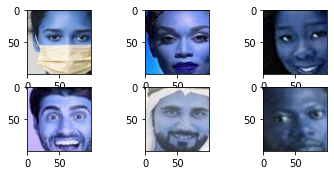

In [ ]:
# importing matplot lib
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
plt.subplot(331)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(X_train_color))
plt.imshow(X_train_color[random_num], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Step 3A - Prepare our dataset for training

In [ ]:
X_train_color.shape

(4800, 100, 100, 3)

In [ ]:
# Lets store the number of rows and columns
img_rows = X_train_color[0].shape[0]
img_cols = X_train_color[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
X_train_color = X_train_color.reshape(X_train_color.shape[0], img_rows, img_cols, 3)
X_test_color = X_test_color.reshape(X_test_color.shape[0], img_rows, img_cols, 3)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 3)

# change our image type to float32 data type
X_train_color = X_train_color.astype('float32')
X_test_color = X_test_color.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
X_train_color /= 255
X_test_color /= 255

print('X_train_color shape:', X_train_color.shape)
print(X_train_color.shape[0], 'train samples')
print(X_test_color.shape[0], 'test samples')


X_train_color shape: (4800, 100, 100, 3)
4800 train samples
1200 test samples


### Step 3B - One Hot Encode Our Labels (Y)

In [ ]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train_color = np_utils.to_categorical(y_train_color)
y_test_color = np_utils.to_categorical(y_test_color)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test_color.shape[1]))

num_classes = y_test_color.shape[1]
num_pixels = X_train_color.shape[1] * X_train_color.shape[2]

Number of Classes: 6


In [ ]:
y_train_color[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 6 categorical units

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 

# create model_color
model_color = Sequential()

model_color.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_color.add(Conv2D(64, (3, 3), activation='relu'))
model_color.add(MaxPooling2D(pool_size=(2, 2)))
model_color.add(Dropout(0.25))
model_color.add(Flatten())
model_color.add(Dense(128, activation='relu'))
model_color.add(Dropout(0.5))
model_color.add(Dense(num_classes, activation='softmax'))

model_color.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model_color.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               18874496  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [ ]:
batch_size = 64
epochs = 48

history = model_color.fit(X_train_color,
                    y_train_color,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test_color, y_test_color))

score = model_color.evaluate(X_test_color, y_test_color, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/48
75/75 [==============================] - 93s 1s/step - loss: 1.8070 - accuracy: 0.1781 - val_loss: 1.7762 - val_accuracy: 0.2050
Epoch 2/48
75/75 [==============================] - 95s 1s/step - loss: 1.7409 - accuracy: 0.2534 - val_loss: 1.7578 - val_accuracy: 0.2150
Epoch 3/48
75/75 [==============================] - 93s 1s/step - loss: 1.6924 - accuracy: 0.2925 - val_loss: 1.6986 - val_accuracy: 0.2900
Epoch 4/48
75/75 [==============================] - 91s 1s/step - loss: 1.6475 - accuracy: 0.3211 - val_loss: 1.6602 - val_accuracy: 0.3533
Epoch 5/48
75/75 [==============================] - 92s 1s/step - loss: 1.6159 - accuracy: 0.3429 - val_loss: 1.6335 - val_accuracy: 0.3658
Epoch 6/48
75/75 [==============================] - 90s 1s/step - loss: 1.5605 - accuracy: 0.3730 - val_loss: 1.6116 - val_accuracy: 0.3633
Epoch 7/48
75/75 [==============================] - 89s 1s/step - loss: 1.5424 - accuracy: 0.3960 - val_loss: 1.5636 - val_accuracy: 0.3975
Epoch 8/48
75/75 [==

# 6. plot loss and accuracy chart

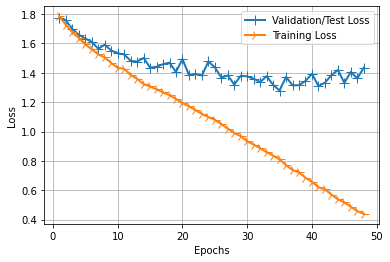

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

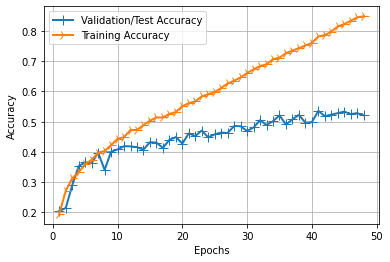

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
score

[1.4356958866119385, 0.5208333134651184]

## Step 7 - Saving our Model

In [ ]:
model_color.save("./Predict_Student_Demography2.h5")
print("Predict_Student_Demography2.h5 Saved")

Predict_Student_Demography2.h5 Saved
